# Histograms after cell segmentation

Cristina de Dios - 05/04/2021

Given the difficulties in cell segmentation (high background, diffuse cell distribution...) we decided to analyze the histograms of different types of cells from the images coming from femur or humerus of mice. As well as analyzing candidates of HSC (still waiting to verify with Francesca after taking into consideration the .tiff images), we decided to manually segmentate a perfect candidate (veredict 3 out of 3, points 1, Femur 7), a good candidate (veredict 2 out of 3, points 9 Femur 8) and a bad candidate (veredict 0 out of 3, points 12 Femur 8, same Z position). To evaluate possible bias with other cells, we also decided to perform segmentation of (I think) a macrophage  and a differentiated cell found in the same Z position. Here we show the histogram of each cell in each tissue.

### Importing libraries

In [2]:
import cv2
import matplotlib.pyplot as plt

### Studying local histogram on a clearly visualized HSC

Let's start with undoubtlessly perfect HSC. We first manually segmented the cells using Napari viewer. Each mask was substacked and transformed to 8-bit image on ImageJ

In [16]:
nice_dir = "C:/Users/cdedi/Desktop/Histogram_show/Nice/"
blue_nice = cv2.imread(nice_dir + "blue.tif",0)
red_nice = cv2.imread(nice_dir + "red.tif",0)
white_nice = cv2.imread(nice_dir + "white.tif",0)
HSC_mask_nice = cv2.imread(nice_dir + "HSC.tif",0)
macroph_mask_nice = cv2.imread(nice_dir + "macrophage.tif",0)
diffcell_mask_nice = cv2.imread(nice_dir + "diffcell.tif",0)

Next, we designed a function to apply the mask to the global image, and another one to extract the histogram from the segmented region

In [36]:
# Setting mask
def masking(image,mask):
    return cv2.bitwise_and(image,image,mask = mask)

In [37]:
# Extracting histogram
def histmask(image,mask):
    return cv2.calcHist([image],[0],mask,[256],[0,256])

The histogram from the perfect candidate to HSC on each channel is depicted below. Note that these are the expected perfect histogram (each histogram is represented with its channel color)

In [45]:
#Histogram for perfect hematopoietic stem cell
def mask_hist_plotter(red,blue,white,mask,xpos,ypos,surrpix):
    red_mask = masking(red,mask)
    red_mask = red_mask[(ypos-surrpix):(ypos+surrpix),(xpos-surrpix):(xpos+surrpix)]
    red_hist = histmask(red,mask)
    white_mask = masking(white,mask)
    white_mask = white_mask[(ypos-surrpix):(ypos+surrpix),(xpos-surrpix):(xpos+surrpix)]
    white_hist = histmask(white,mask)
    blue_mask = masking(blue,mask)
    blue_mask = blue_mask[(ypos-surrpix):(ypos+surrpix),(xpos-surrpix):(xpos+surrpix)]
    blue_hist = histmask(blue,mask)
    plt.figure(figsize = (20,20))
    plt.subplot(2,2,1),plt.imshow(red_mask,cmap="hot")
    plt.subplot(2,2,2),plt.imshow(white_mask,cmap="gray")
    plt.subplot(2,2,3),plt.imshow(white_mask,cmap="Blues")
    plt.subplot(2,2,4),plt.plot(red_hist, color = "red"),plt.plot(white_hist, color = "black"), plt.plot(blue_hist)
    plt.xlim([0,256])

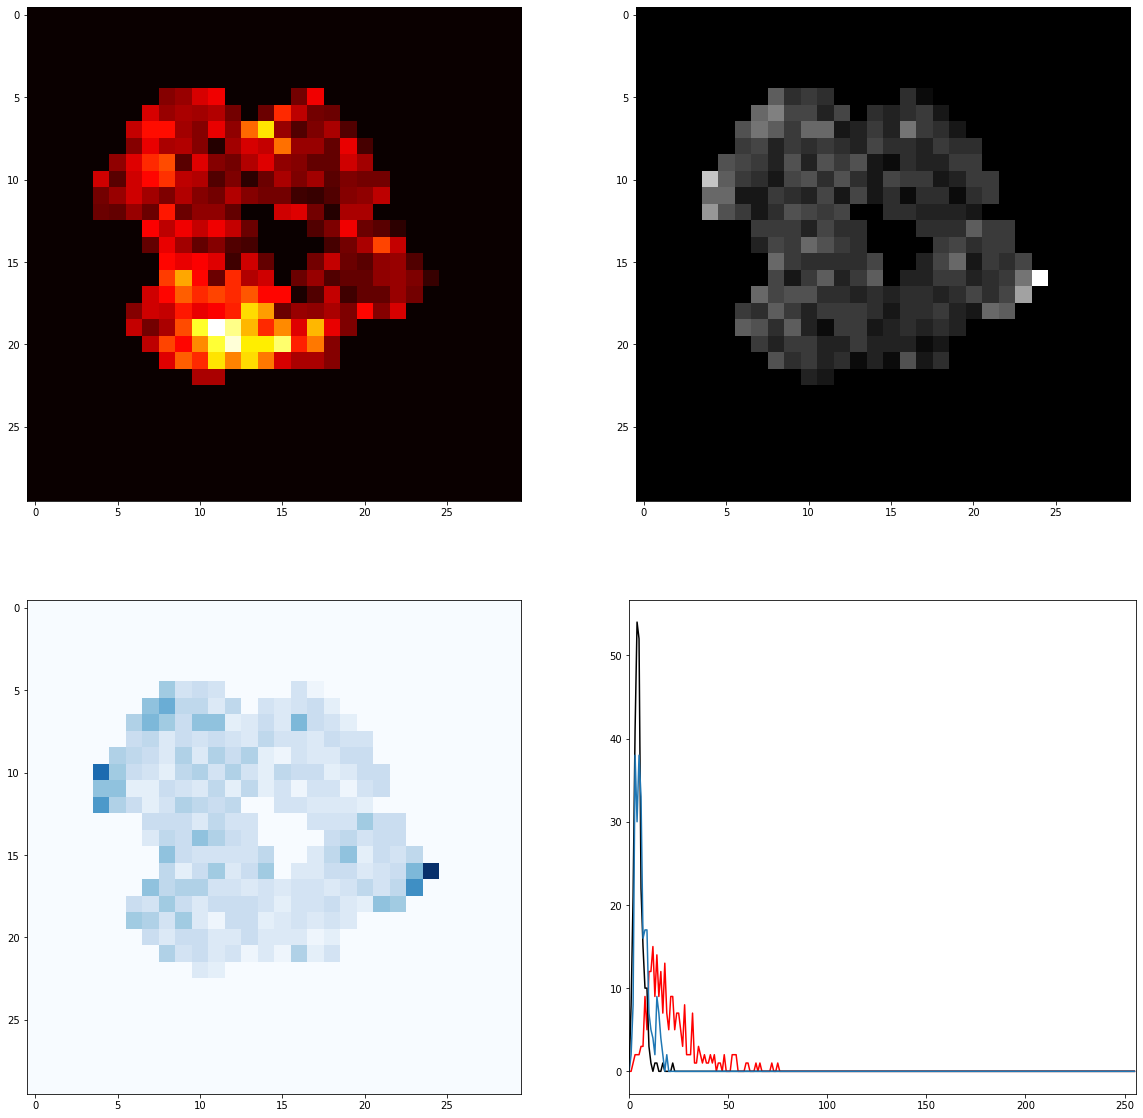

In [46]:
mask_hist_plotter(red_nice,blue_nice,white_nice,HSC_mask_nice,395,87,15)

As expected, differences with the macrophages and differentiated cells are clear

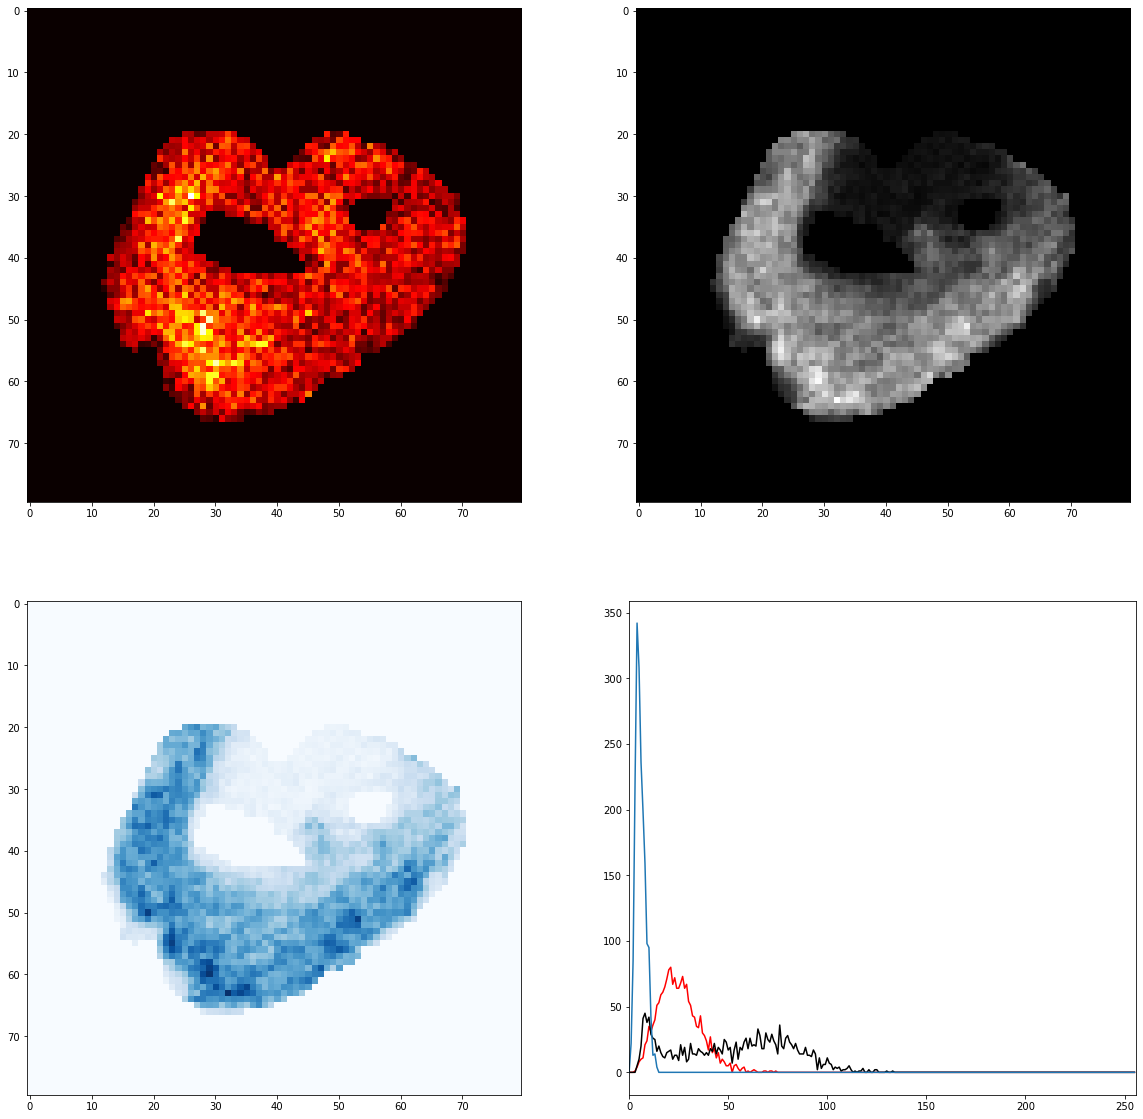

In [51]:
mask_hist_plotter(red_nice,blue_nice,white_nice,macroph_mask_nice,481,266,40)

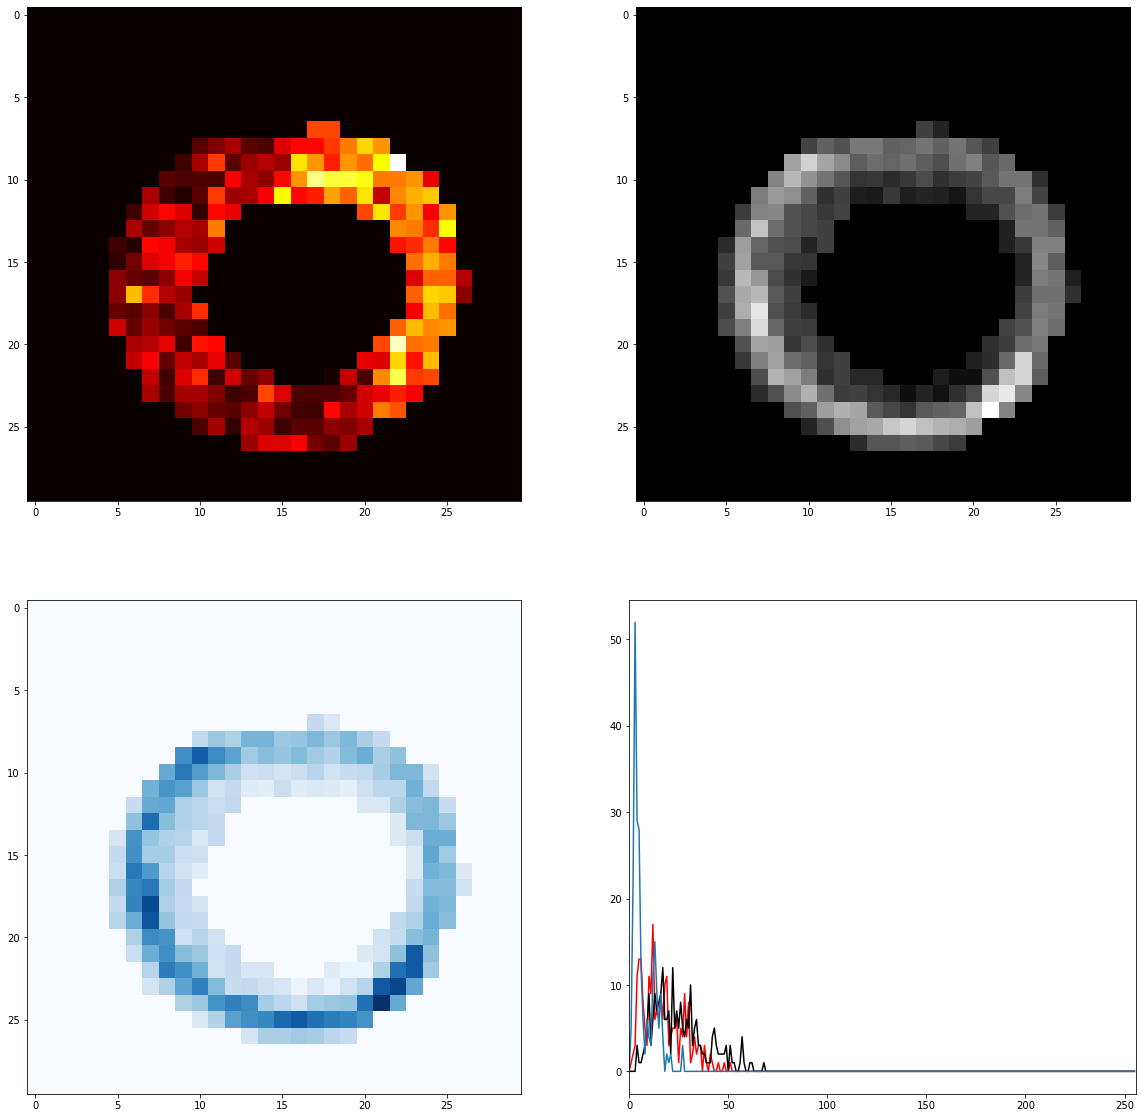

In [53]:
mask_hist_plotter(red_nice,blue_nice,white_nice,diffcell_mask_nice,486,486,15)

### Studying the histograms of not so clear HSCs

However, the situation found above is not usual. Most of our HSC are classified as 2 out of 3 or lower (with a exclusion of 12 of 84 after looking at the .tiff images). So, to get into the real concept we also analyzed the histograms of a 0 and a 2 out of 3 at the same Z position from the same tissue. We also compared with the histograms of a macrophage and a differentiated cell of that slice.

In [54]:
nice_dir = "C:/Users/cdedi/Desktop/Histogram_show/Mid and bad/"
blue_doubt = cv2.imread(nice_dir + "blue.tif",0)
red_doubt = cv2.imread(nice_dir + "red.tif",0)
white_doubt = cv2.imread(nice_dir + "white.tif",0)
nonHSC_mask = cv2.imread(nice_dir + "nonHSC.tif",0)
possHSC_mask = cv2.imread(nice_dir + "possHSC.tif",0)
macroph_mask_doubt = cv2.imread(nice_dir + "macrophage.tif",0)
diffcell_mask_doubt = cv2.imread(nice_dir + "diffcell.tif",0)

We find a little bit different histogram in both HSCs...

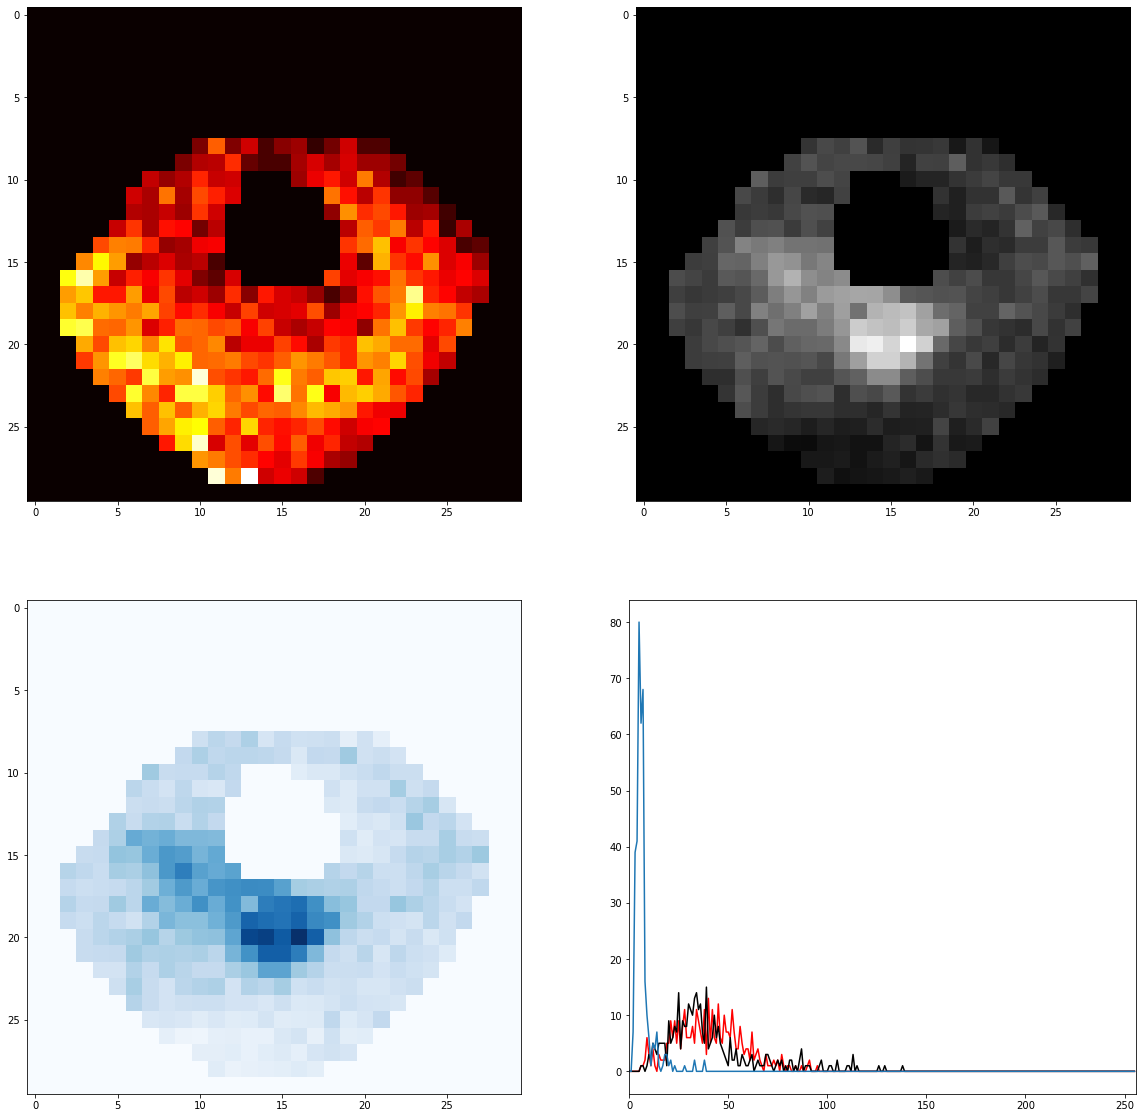

In [55]:
# Histograms from the 0 out of 3
mask_hist_plotter(red_doubt,blue_doubt,white_doubt,nonHSC_mask,777,691,15)

Here it is clear. Let's see a 2 out of 3

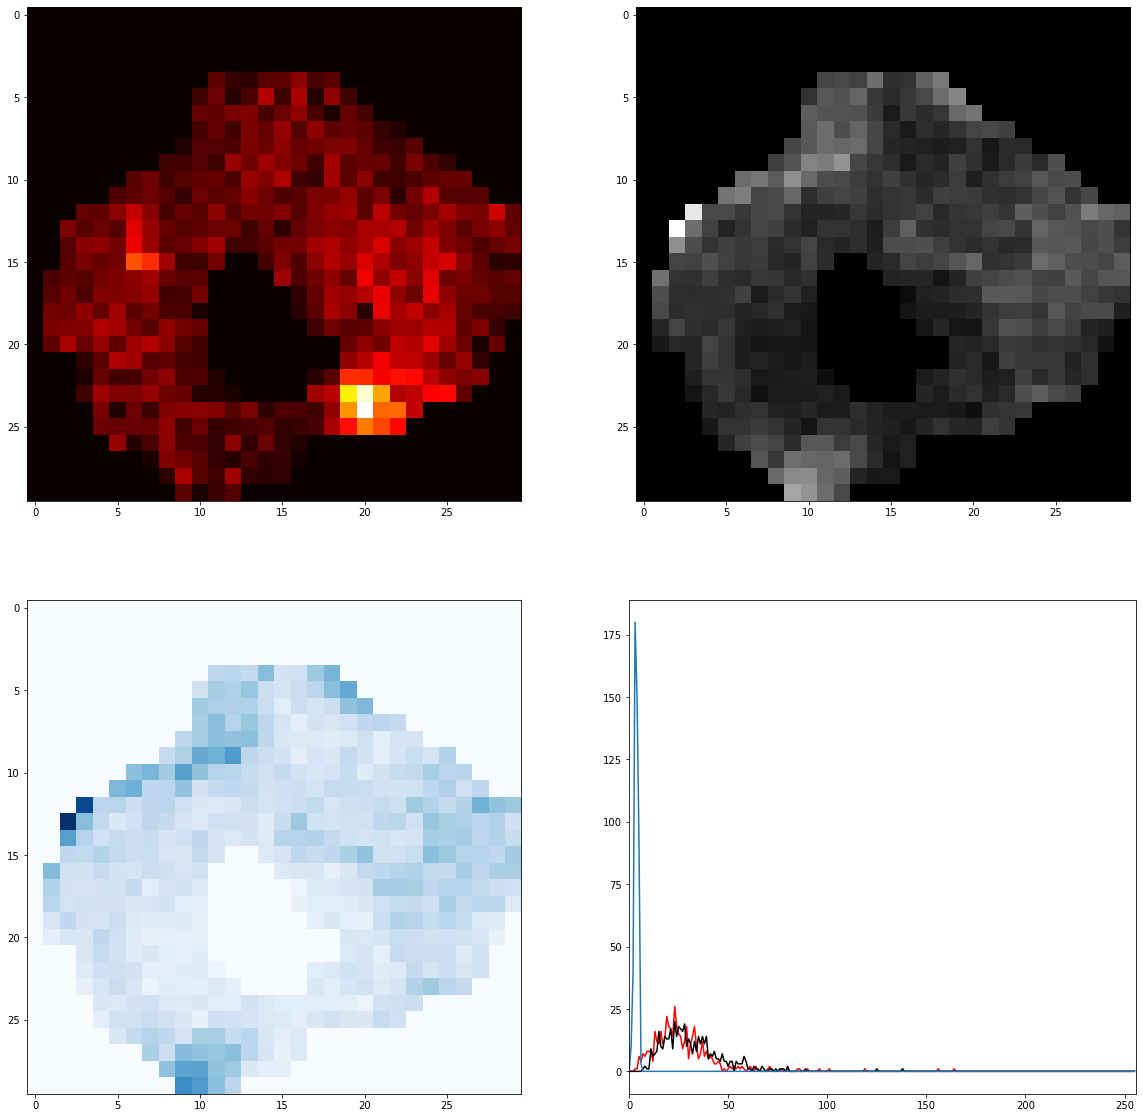

In [56]:
# Histograms from the 0 out of 3
mask_hist_plotter(red_doubt,blue_doubt,white_doubt,possHSC_mask,562,287,15)

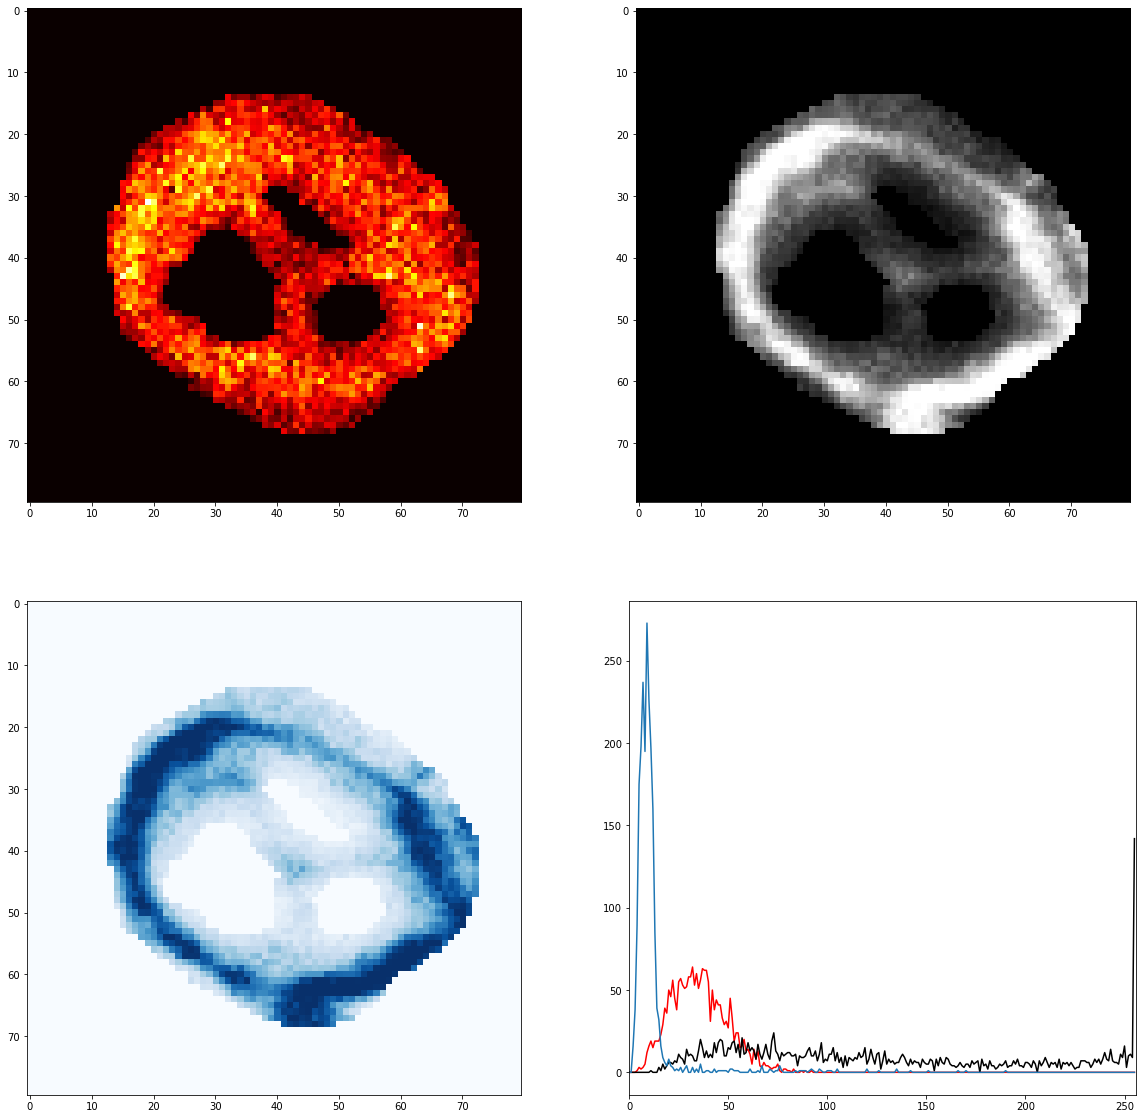

In [57]:
# Histograms from the 0 out of 3
mask_hist_plotter(red_doubt,blue_doubt,white_doubt,macroph_mask_doubt,690,747,40)

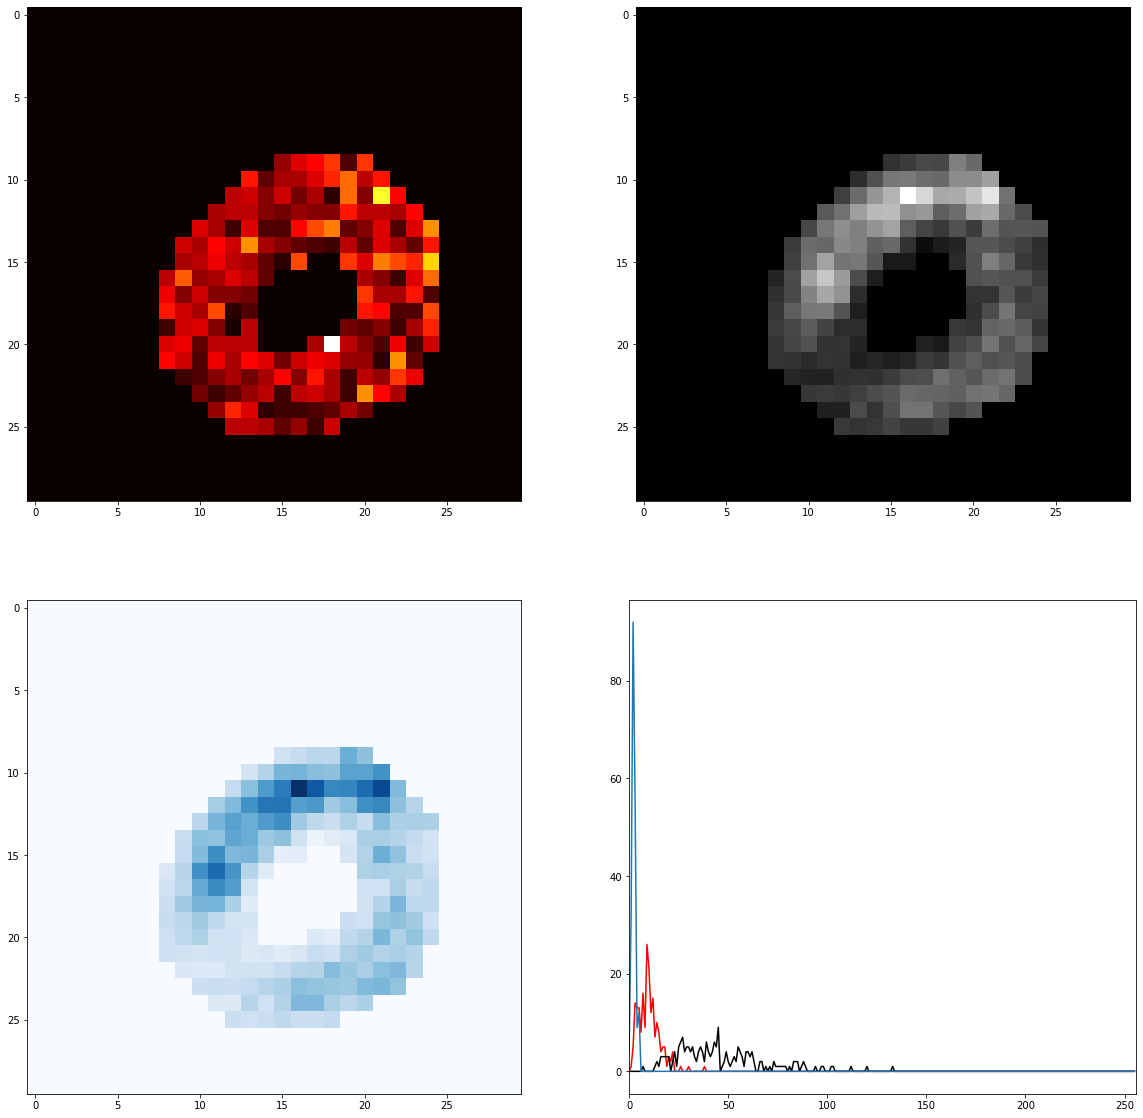

In [58]:
# Histograms from the 0 out of 3
mask_hist_plotter(red_doubt,blue_doubt,white_doubt,diffcell_mask_doubt,697,391,15)